<a href="https://colab.research.google.com/github/fmonteci/Telecom_x/blob/main/Telecom_X_FM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***
#Telecom X
***

In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Carga de Datos

In [52]:
datos=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Archivos/Telecom X/df_normalizado.csv')
datos.sample(10)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
1445,2075-rmjik,0.0,1,0,1,1,5,1,no,dsl,...,no,no,no,no,month-to-month,1,mailed check,49.40,232.55,1.646667
6198,8510-awcxc,1.0,1,1,0,0,13,1,yes,fiber optic,...,no,no,yes,yes,month-to-month,1,electronic check,100.80,1308.10,3.360000
1026,1442-okrje,0.0,0,0,1,1,66,1,no,fiber optic,...,yes,no,yes,yes,one year,1,bank transfer (automatic),103.15,7031.30,3.438333
4019,5498-txhlf,1.0,1,0,1,1,34,1,yes,fiber optic,...,yes,no,yes,no,month-to-month,0,electronic check,87.45,2874.15,2.915000
4743,6502-hcjti,1.0,0,1,1,0,7,1,yes,fiber optic,...,no,no,no,yes,month-to-month,1,credit card (automatic),94.70,673.10,3.156667
6510,8946-bfwsg,0.0,0,0,1,1,63,1,yes,no,...,no internet service,no internet service,no internet service,no internet service,two year,0,mailed check,25.25,1573.05,0.841667
3661,5046-nuhwd,0.0,1,1,1,0,29,0,no phone service,dsl,...,yes,no,no,yes,month-to-month,1,electronic check,45.00,1228.65,1.500000
461,0655-ydgfj,0.0,0,0,0,0,29,1,no,dsl,...,yes,no,no,no,month-to-month,0,bank transfer (automatic),48.95,1323.70,1.631667
5737,7841-tzdmq,1.0,0,0,0,0,2,1,no,dsl,...,no,no,no,no,month-to-month,1,credit card (automatic),46.00,84.50,1.533333
5027,6873-udnld,0.0,0,0,0,0,40,1,no,dsl,...,yes,no,no,yes,month-to-month,0,electronic check,67.45,2731.00,2.248333


In [53]:
datos.shape

(7267, 22)

#Eliminando columnas irrelevantes

In [54]:
datos=datos.drop('customerID', axis=1)
datos=datos.drop("Cuentas_Diarias", axis=1)
datos.head()

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0.0,1,0,1,1,9,1,no,dsl,no,yes,no,yes,yes,no,one year,1,mailed check,65.6,593.30
1,0.0,0,0,0,0,9,1,yes,dsl,no,no,no,no,no,yes,month-to-month,0,mailed check,59.9,542.40
2,1.0,0,0,0,0,4,1,no,fiber optic,no,no,yes,no,no,no,month-to-month,1,electronic check,73.9,280.85
3,1.0,0,1,1,0,13,1,no,fiber optic,no,yes,yes,no,yes,yes,month-to-month,1,electronic check,98.0,1237.85
4,1.0,1,1,1,0,3,1,no,fiber optic,no,no,no,yes,yes,no,month-to-month,1,mailed check,83.9,267.40


In [55]:
datos.Churn.unique()

array([ 0.,  1., nan])

Elimino las filas vacias de churn y Charges total

In [56]:
datos=datos.dropna(subset=['Churn'])
datos=datos.dropna(subset=['Charges.Total'])

In [57]:
datos.columns

Index(['Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'Charges.Monthly', 'Charges.Total'],
      dtype='object')

#ajuste de respuesta No iternet Service

In [58]:
#homologacion de no en categorias de internet
col_a_corregir=["OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies"]
datos[col_a_corregir]=datos[col_a_corregir].replace('no internet service','no')
datos['MultipleLines']=datos['MultipleLines'].replace('no phone service','no')

In [59]:
datos['OnlineBackup'].unique()

array(['yes', 'no'], dtype=object)

In [60]:
#aseguramos homogeneidad de  las variables
for x in datos.columns:
    print("-------------")
    print(x)
    print(datos[x].unique())

-------------
Churn
[0. 1.]
-------------
gender
[1 0]
-------------
SeniorCitizen
[0 1]
-------------
Partner
[1 0]
-------------
Dependents
[1 0]
-------------
tenure
[ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 37 49 66 67
 20 43 59 12 27  2 25 29 14 35 64 39 40 11  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 31 36 17 18 51 38 42]
-------------
PhoneService
[1 0]
-------------
MultipleLines
['no' 'yes']
-------------
InternetService
['dsl' 'fiber optic' 'no']
-------------
OnlineSecurity
['no' 'yes']
-------------
OnlineBackup
['yes' 'no']
-------------
DeviceProtection
['no' 'yes']
-------------
TechSupport
['yes' 'no']
-------------
StreamingTV
['yes' 'no']
-------------
StreamingMovies
['no' 'yes']
-------------
Contract
['one year' 'month-to-month' 'two year']
-------------
PaperlessBilling
[1 0]
-------------
PaymentMethod
['mailed check' 'electronic check' 'credit card (automatic)'
 'bank transfer (automatic)']
-------------

#Verficando el desbalanceo de datos de variable target

In [61]:
import plotly.express as px

In [62]:
px.histogram(datos, x='Churn', title="Análisis de Churn", template="simple_white", text_auto=True, color="Churn")

Se observa que la variable taget se enciuentra desbalanceada, más adelante esta debera ser balanceada mediante algun procedimiento como over u ondersampling, que buscan igualar las proporciones de respuestas en la variable

#Hot Encoding
Transformaremos las variables categoricas que no fueron tratadas anteriormente como por ejemplo:
- MultipleLines
- InternetService
- OnlineSecurity
- OnlineBackup
- DeviceProtection  
- TechSupport      
- StreamingTV
- StreamingMovies  
- Contract
- PaymentMethod

Variables Transformadas anteriromente
- Churn 1: yes, 0: no
- gender 1: female, 0: male
- partner 1: yes, 0: no
- Dependents 1: yes, 0: no
- PhoneService 1: yes, 0: no
- PaperlessBilling 1: yes, 0: no

In [63]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             7032 non-null   float64
 1   gender            7032 non-null   int64  
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   int64  
 4   Dependents        7032 non-null   int64  
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   int64  
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   int64  
 17  

In [64]:
columnas_cate=datos.select_dtypes(include='object').columns
columnas_cate

Index(['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaymentMethod'],
      dtype='object')

In [65]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

In [66]:
columnas=datos.columns
columnas

Index(['Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'Charges.Monthly', 'Charges.Total'],
      dtype='object')

In [67]:
onehot=make_column_transformer(
        (OneHotEncoder(drop="if_binary"),
        columnas_cate),
        remainder="passthrough",
        sparse_threshold=0,
        force_int_remainder_cols=False)

In [68]:
datos_num=onehot.fit_transform(datos)

In [69]:
onehot.get_feature_names_out(columnas)

array(['onehotencoder__MultipleLines_yes',
       'onehotencoder__InternetService_dsl',
       'onehotencoder__InternetService_fiber optic',
       'onehotencoder__InternetService_no',
       'onehotencoder__OnlineSecurity_yes',
       'onehotencoder__OnlineBackup_yes',
       'onehotencoder__DeviceProtection_yes',
       'onehotencoder__TechSupport_yes', 'onehotencoder__StreamingTV_yes',
       'onehotencoder__StreamingMovies_yes',
       'onehotencoder__Contract_month-to-month',
       'onehotencoder__Contract_one year',
       'onehotencoder__Contract_two year',
       'onehotencoder__PaymentMethod_bank transfer (automatic)',
       'onehotencoder__PaymentMethod_credit card (automatic)',
       'onehotencoder__PaymentMethod_electronic check',
       'onehotencoder__PaymentMethod_mailed check', 'remainder__Churn',
       'remainder__gender', 'remainder__SeniorCitizen',
       'remainder__Partner', 'remainder__Dependents', 'remainder__tenure',
       'remainder__PhoneService', 'remain

In [78]:
columnas_cod=['MultipleLines_yes',
       'InternetService_dsl',
       'InternetService_fiber optic',
       'InternetService_no',
       'OnlineSecurity_yes',
       'OnlineBackup_yes',
       'DeviceProtection_yes',
       'TechSupport_yes', 'StreamingTV_yes',
       'StreamingMovies_yes',
       'Contract_month-to-month',
       'Contract_one year',
       'Contract_two year',
       'PaymentMethod_bank transfer (automatic)',
       'PaymentMethod_credit card (automatic)',
       'PaymentMethod_electronic check',
       'PaymentMethod_mailed check', 'Churn',
       'gender', 'SeniorCitizen',
       'Partner', 'Dependents', 'tenure',
       'PhoneService', 'PaperlessBilling',
       'Charges.Monthly', 'Charges.Total']

In [79]:
datos_num=pd.DataFrame(datos_num, columns=columnas_cod)
datos_num.sample(10)

,MultipleLines_yes,InternetService_dsl,InternetService_fiber optic,InternetService_no,OnlineSecurity_yes,OnlineBackup_yes,DeviceProtection_yes,TechSupport_yes,StreamingTV_yes,StreamingMovies_yes,...,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,Charges.Monthly,Charges.Total
5247,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,25.0,1.0,0.0,20.60,541.50
2349,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,19.20,19.20
182,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,19.0,1.0,1.0,65.35,1231.85
759,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,15.0,1.0,1.0,51.10,711.15
6117,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,1.0,1.0,0.0,0.0,16.0,1.0,0.0,59.40,1023.90
1895,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,1.0,10.0,1.0,0.0,95.20,930.40
240,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,19.35,46.35
5111,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,69.25,69.25
7011,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,71.0,1.0,1.0,24.40,1725.40
3880,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,19.0,1.0,1.0,19.95,373.50


In [80]:
datos_num.columns

Index(['MultipleLines_yes', 'InternetService_dsl',
       'InternetService_fiber optic', 'InternetService_no',
       'OnlineSecurity_yes', 'OnlineBackup_yes', 'DeviceProtection_yes',
       'TechSupport_yes', 'StreamingTV_yes', 'StreamingMovies_yes',
       'Contract_month-to-month', 'Contract_one year', 'Contract_two year',
       'PaymentMethod_bank transfer (automatic)',
       'PaymentMethod_credit card (automatic)',
       'PaymentMethod_electronic check', 'PaymentMethod_mailed check', 'Churn',
       'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'PaperlessBilling', 'Charges.Monthly', 'Charges.Total'],
      dtype='object')

Luego de ajustes y codificacion quedamos con 27 columnas, se eliminaron las variables ID cliente y Cuentas diarias, variable que se calcula a partir de otra variable

In [81]:
datos_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   MultipleLines_yes                        7032 non-null   float64
 1   InternetService_dsl                      7032 non-null   float64
 2   InternetService_fiber optic              7032 non-null   float64
 3   InternetService_no                       7032 non-null   float64
 4   OnlineSecurity_yes                       7032 non-null   float64
 5   OnlineBackup_yes                         7032 non-null   float64
 6   DeviceProtection_yes                     7032 non-null   float64
 7   TechSupport_yes                          7032 non-null   float64
 8   StreamingTV_yes                          7032 non-null   float64
 9   StreamingMovies_yes                      7032 non-null   float64
 10  Contract_month-to-month                  7032 no

#Calculando VIF

In [83]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

In [85]:
x=datos_num.drop('Churn', axis=1)
vif_df=pd.DataFrame()
vif_df['variables']=x.columns
vif_df['VIF']=[vif(x.values, i) for i in range(len(x.columns))]
print(vif_df)

                                  variables         VIF
0                         MultipleLines_yes    7.289761
1                       InternetService_dsl         inf
2               InternetService_fiber optic         inf
3                        InternetService_no         inf
4                        OnlineSecurity_yes    6.338349
5                          OnlineBackup_yes    6.796678
6                      DeviceProtection_yes    6.924754
7                           TechSupport_yes    6.476508
8                           StreamingTV_yes   24.080019
9                       StreamingMovies_yes   24.156394
10                  Contract_month-to-month         inf
11                        Contract_one year         inf
12                        Contract_two year         inf
13  PaymentMethod_bank transfer (automatic)         inf
14    PaymentMethod_credit card (automatic)         inf
15           PaymentMethod_electronic check         inf
16               PaymentMethod_mailed check     

IF

-**VIF<1:** caracteristicas no correlacionadas

-**1<VIF<5:** caract. relativamente correlacionadas
-**VIF>5:** caract. altamente relacionadas

-**VIF>10** Alta correlación, motivo de preocupacion

In [88]:
#Vif iteracion 2
var_alta_corr=["Contract_two year","PaymentMethod_mailed check","Charges.Monthly","Churn"]
x2=datos_num.copy()
x2=x2.drop(var_alta_corr, axis=1)
vif_df=pd.DataFrame()
vif_df['variables']=x2.columns
vif_df['VIF']=[vif(x2.values, i) for i in range(len(x2.columns))]
print(vif_df)



                                  variables        VIF
0                         MultipleLines_yes   1.456648
1                       InternetService_dsl  13.905531
2               InternetService_fiber optic  21.524506
3                        InternetService_no   9.075665
4                        OnlineSecurity_yes   1.480218
5                          OnlineBackup_yes   1.475759
6                      DeviceProtection_yes   1.546846
7                           TechSupport_yes   1.541417
8                           StreamingTV_yes   1.723829
9                       StreamingMovies_yes   1.738445
10                  Contract_month-to-month   3.601318
11                        Contract_one year   1.713599
12  PaymentMethod_bank transfer (automatic)   1.805505
13    PaymentMethod_credit card (automatic)   1.777532
14           PaymentMethod_electronic check   2.183558
15                                   gender   1.001975
16                            SeniorCitizen   1.153190
17        

In [90]:
var_modelo=["MultipleLines_yes","InternetService_no","OnlineSecurity_yes","OnlineBackup_yes","DeviceProtection_yes","TechSupport_yes","StreamingTV_yes","StreamingMovies_yes","Contract_month-to-month",
                                 "Contract_one year","PaymentMethod_bank transfer (automatic)","PaymentMethod_credit card (automatic)","PaymentMethod_electronic check","gender",
                                  "SeniorCitizen","Partner","Dependents","tenure","PhoneService","PaperlessBilling","Charges.Total"]

#Balanceo de datos: Oversampling

In [92]:
X=datos_num.drop('Churn', axis=1)
Y=datos_num['Churn']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify= Y)

In [93]:
from imblearn.over_sampling import SMOTE
seed_random=42
smote=SMOTE(random_state=seed_random)

In [94]:
X_osample=X_train.copy()
Y_osample=Y_train.copy()
X_osample,Y_osample=smote.fit_resample(X_osample,Y_osample)

In [95]:
datos_balanceados=pd.concat([X_osample,Y_osample], axis=1)
datos_balanceados

,MultipleLines_yes,InternetService_dsl,InternetService_fiber optic,InternetService_no,OnlineSecurity_yes,OnlineBackup_yes,DeviceProtection_yes,TechSupport_yes,StreamingTV_yes,StreamingMovies_yes,...,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,Charges.Monthly,Charges.Total,Churn
0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,37.000000,1.0,0.0,20.350000,697.650000,0.0
1,0.0,0.0,1.0,0.0,1.000000,0.000000,0.00000,1.000000,1.000000,1.000000,...,0.000000,0.000000,1.000000,1.000000,68.000000,1.0,1.0,99.550000,6668.000000,0.0
2,0.0,0.0,1.0,0.0,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,3.000000,1.0,0.0,73.850000,196.400000,0.0
3,0.0,1.0,0.0,0.0,1.000000,1.000000,0.00000,1.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,9.000000,1.0,1.0,68.950000,593.850000,0.0
4,1.0,1.0,0.0,0.0,1.000000,0.000000,0.00000,0.000000,1.000000,0.000000,...,1.000000,0.000000,1.000000,1.000000,56.000000,1.0,0.0,65.200000,3512.150000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8255,1.0,0.0,1.0,0.0,0.000000,0.594242,0.00000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,14.000000,1.0,1.0,77.063224,1099.577754,1.0
8256,1.0,0.0,1.0,0.0,0.603150,0.603150,0.39685,0.603150,1.000000,1.000000,...,1.000000,0.396850,0.000000,0.000000,51.984249,1.0,1.0,105.820399,5534.541833,1.0
8257,0.0,1.0,0.0,0.0,0.317468,0.317468,0.00000,0.682532,0.000000,0.000000,...,0.682532,0.000000,0.682532,0.682532,3.000000,0.0,1.0,32.412731,98.796117,1.0
8258,0.0,0.0,1.0,0.0,0.000000,0.424641,0.00000,0.000000,0.000000,0.575359,...,0.424641,1.000000,0.000000,0.000000,15.000000,1.0,1.0,77.658973,1152.426857,1.0


In [96]:
datos_balanceados["Churn"].value_counts()

,count
Churn,
0.0,4130
1.0,4130


#Normalizando datos
se deben normalizar las variables:

-tenure

-Charges.montly

-Charges.total

In [97]:
numericas=["tenure","Charges.Monthly","Charges.Total"]

In [99]:
for i in numericas:
  minimo=datos_balanceados[i].min()
  maximo=datos_balanceados[i].max()
  datos_balanceados[i]=(datos_balanceados[i]-minimo)/(maximo-minimo)

In [100]:
datos_balanceados.head()

,MultipleLines_yes,InternetService_dsl,InternetService_fiber optic,InternetService_no,OnlineSecurity_yes,OnlineBackup_yes,DeviceProtection_yes,TechSupport_yes,StreamingTV_yes,StreamingMovies_yes,...,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,Charges.Monthly,Charges.Total,Churn
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.507042,1.0,0.0,0.020896,0.078335,0.0
1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,1.0,1.0,0.943662,1.0,1.0,0.808955,0.767274,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.028169,1.0,0.0,0.553234,0.020494,0.0
3,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.112676,1.0,1.0,0.504478,0.066357,0.0
4,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,1.0,0.774648,1.0,0.0,0.467164,0.403110,0.0


#Modelos

In [176]:
from sklearn.model_selection import train_test_split
X_entrenamiento_balanceado=datos_balanceados.drop('Churn', axis=1)
Y_entrenamiento_balanceado=datos_balanceados['Churn']
X_train_balanc,X_test_balanc,Y_train_balanc, Y_test_balanc=train_test_split(X_entrenamiento_balanceado,Y_entrenamiento_balanceado, test_size=0.2, random_state=42, stratify=Y_entrenamiento_balanceado)
print(f"el entrenamiento se hara con {len(X_train_balanc)} elementos ")
print(X_train_balanc.shape)
print(Y_train_balanc.shape)
print(X_test_balanc.shape)
print(Y_test_balanc.shape)
print(X_test.shape)

el entrenamiento se hara con 6608 elementos 
(6608, 26)
(6608,)
(1652, 26)
(1652,)
(1407, 26)


In [168]:
#funcion para correr modelo
def modelo_fn(modelo,X_train_balanc,X_test, Y_train_balanc):
  modelo.fit(X_train_balanc,Y_train_balanc)
  y_pred=modelo.predict(X_test)
  return y_pred

In [169]:
#funcion matriz de confusion
from sklearn import metrics
from sklearn.metrics import confusion_matrix
def metricas_fn(Y_test_balanc,y_pred):
  accuracy=metrics.accuracy_score(Y_test_balanc,y_pred)
  precision=metrics.precision_score(Y_test_balanc,y_pred)
  recall=metrics.recall_score(Y_test_balanc,y_pred)
  f1=metrics.f1_score(Y_test_balanc,y_pred)

  metricas=[accuracy,precision,recall,f1]
  cm=confusion_matrix(Y_test_balanc,y_pred)
  return metricas, cm

In [170]:
#funcion graficar matriz de confusion
import seaborn as sns
import matplotlib.pyplot as plt
def matriz_confusion(clasificador,cm):
  plt.figure(figsize=(8,5))
  ax=sns.heatmap(cm,annot=True,cmap="Blues", fmt="d")
  ax.set_title("matriz de confusion "+clasificador)
  ax.set_xlabel("prediccion")
  ax.set_ylabel("real")
  plt.show()

In [171]:
#curva roc y auc
def curvas(modelo,clasificador,Y_test):
  y_pred_proba=modelo.predict_proba(X_test_balanc)[::,1]
  fpr,tpr, _= metrics.roc_curve(Y_test_balanc,y_pred_proba)
  auc=metrics.roc_auc_score(Y_test_balanc,y_pred_proba)
  plt.rcParams["figure.figsize"]=(12.,8.)
  plt.plot(fpr,tpr,label=clasificador + "auc= "+str(auc))
  plt.plot([0,1],[0,1],color="red",lw=2,linestyle="--")
  plt.plot([0,0],[1,0],ls="--",c="green",lw=2),plt.plot([1,1],ls="--",c="green")
  plt.title("curva roc")
  plt.xlabel("tasa de falsos positivos")
  plt.ylabel("tasa de verdaderos positivos")
  plt.legend(loc="lower right")
  plt.show()

In [172]:
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [173]:
dummy = DummyClassifier(strategy="uniform", random_state=seed_random)
rl    = LogisticRegression(max_iter=1000, random_state=seed_random)
rf    = RandomForestClassifier(random_state=seed_random)
knn   = KNeighborsClassifier()
svc   = SVC(random_state=seed_random, probability=True)

clasificadores = [dummy, rl, rf, knn, svc]

In [181]:
resultados = {}
for clf in clasificadores:
    y_pred = modelo_fn(clf, X_train_balanc,X_test, Y_train_balanc)
    resultados[clf.__class__.__name__] = y_pred  # clave legible

resultados

{'DummyClassifier': array([0., 1., 0., ..., 1., 1., 1.]),
 'LogisticRegression': array([1., 1., 1., ..., 1., 1., 1.]),
 'RandomForestClassifier': array([0., 0., 0., ..., 0., 0., 0.]),
 'KNeighborsClassifier': array([1., 1., 1., ..., 1., 1., 1.]),
 'SVC': array([0., 0., 0., ..., 0., 0., 0.])}

In [182]:
index=["accuracy","precision","recall","f1"]
df_metricas=pd.DataFrame(index=index)


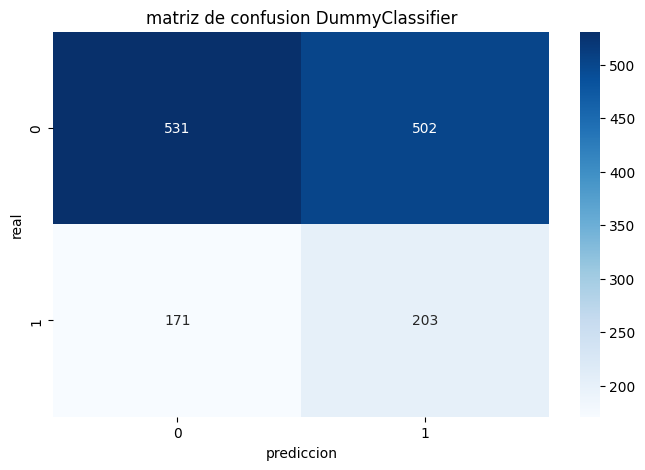

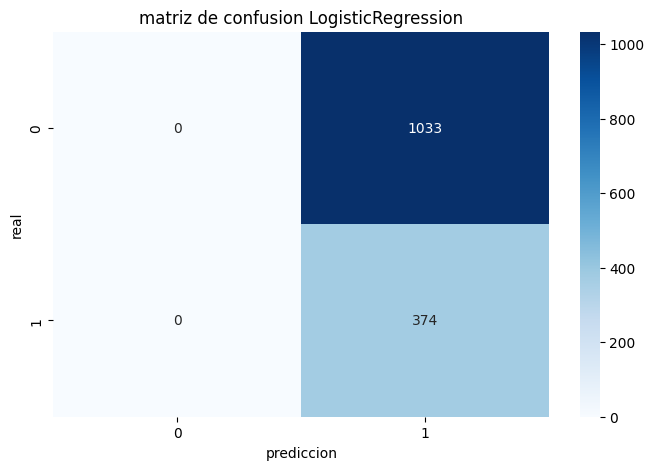

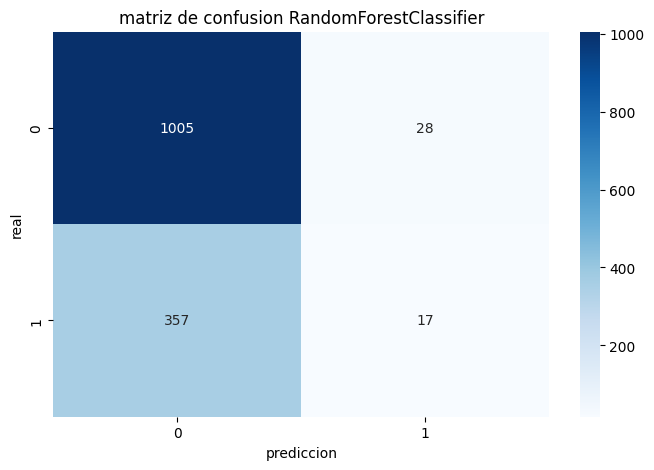

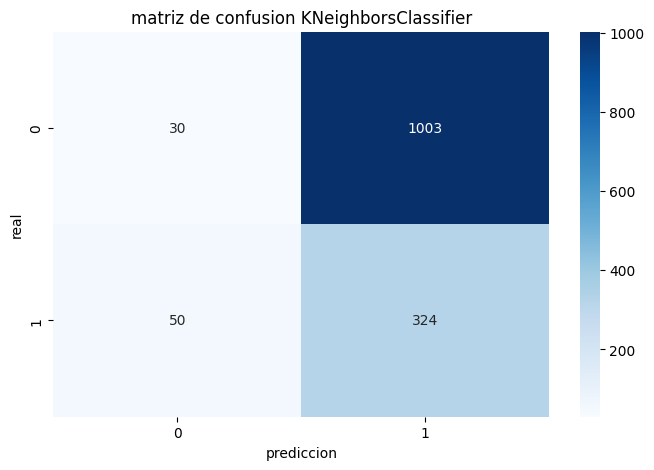

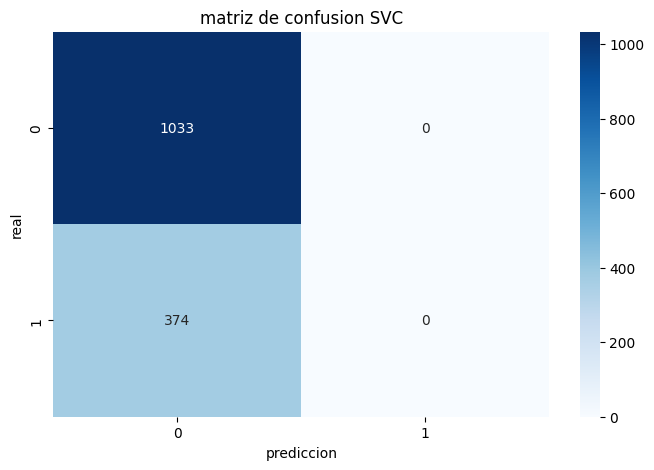

In [187]:
for modelo,y_pred in resultados.items():
  dname=modelo
  metricas, cm = metricas_fn(Y_test,y_pred)
  df_metricas[dname]=metricas
  matriz_confusion(dname,cm)


In [191]:
df_metricas.T.sort_values("recall", ascending=False)

,accuracy,precision,recall,f1
LogisticRegression,0.265814,0.265814,1.000000,0.419989
KNeighborsClassifier,0.251599,0.244160,0.866310,0.380952
DummyClassifier,0.521677,0.287943,0.542781,0.376274
RandomForestClassifier,0.726368,0.377778,0.045455,0.081146
str,0.734186,0.000000,0.000000,0.000000
SVC,0.734186,0.000000,0.000000,0.000000


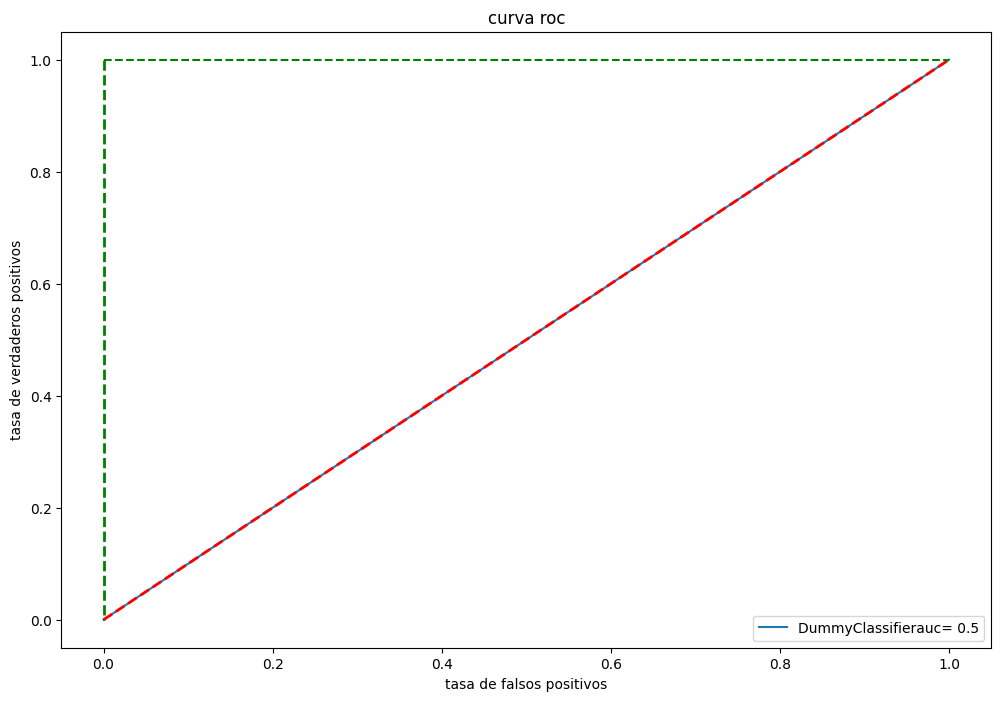

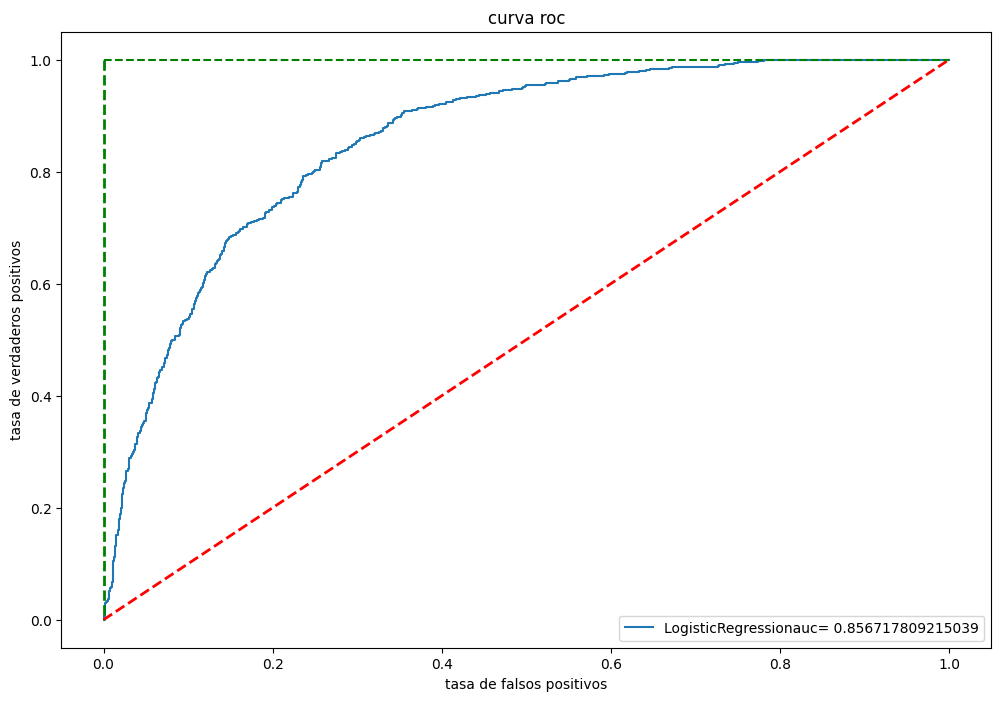

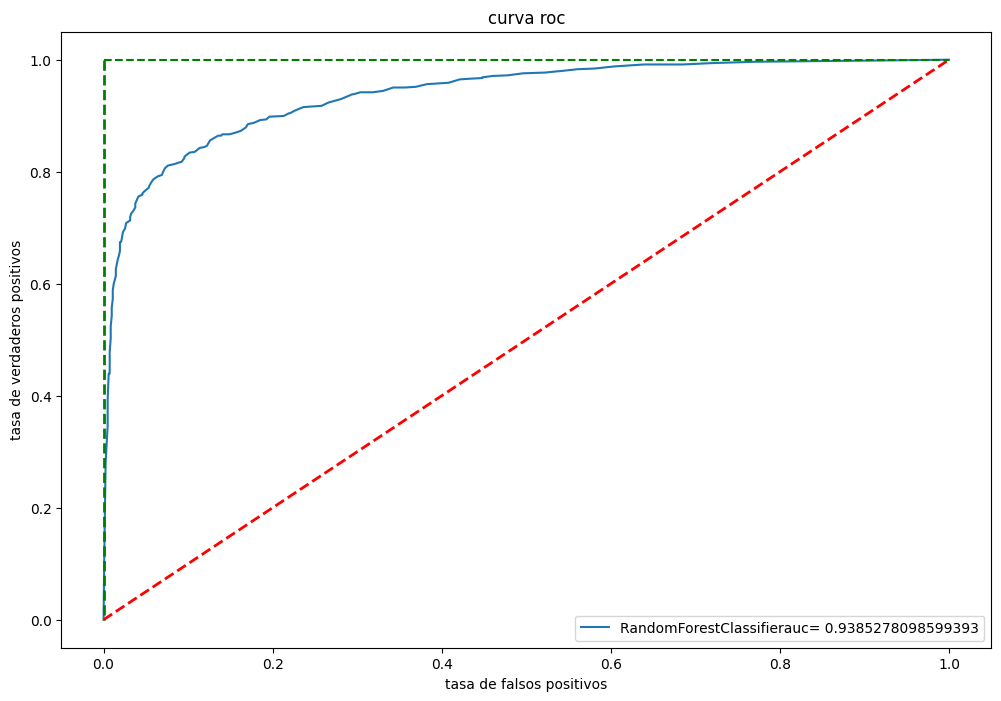

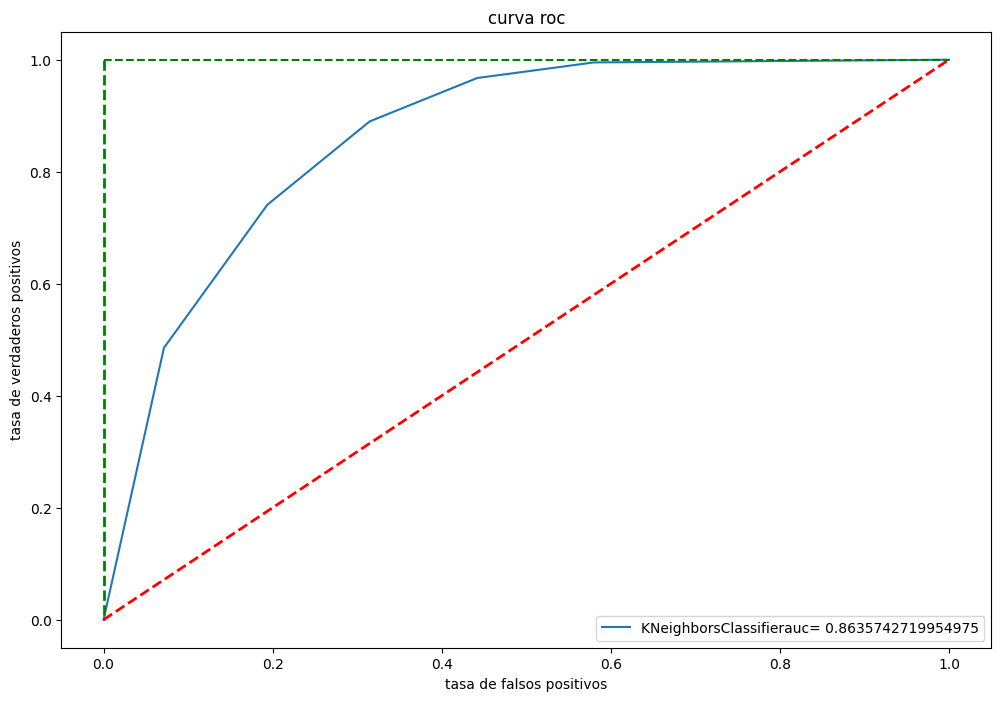

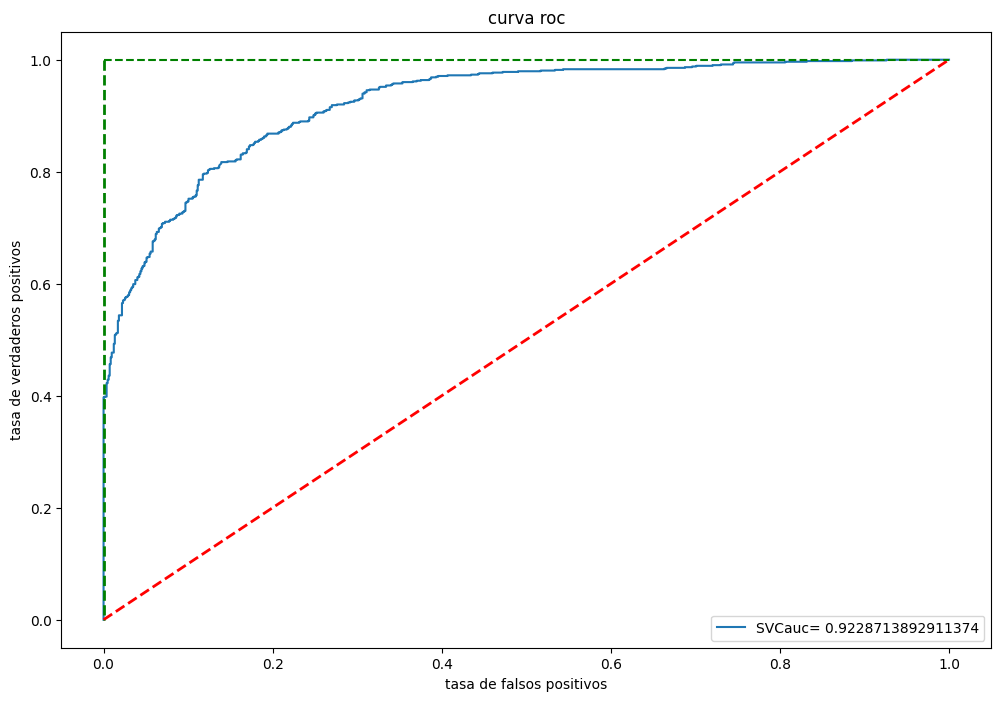

In [192]:
for classifier in clasificadores:
    name = classifier.__class__.__name__
    curvas(classifier, name, Y_test)

El modelo con mejor desempeño es de random forest con aAUC=93.85%
todos las curvas ROC de los modelos superan la curva de Dummy

In [195]:
rf=RandomForestClassifier(random_state=seed_random)
rf.fit(X_train,Y_train)
y_predict=rf.predict(X_test)

print("accuracy: ", metrics.accuracy_score(Y_test,y_predict))
print("precision: ", metrics.precision_score(Y_test,y_predict))
print("recall: ", metrics.recall_score(Y_test,y_predict))
print("f1: ", metrics.f1_score(Y_test,y_predict))

accuracy:  0.7917555081734187
precision:  0.6451612903225806
recall:  0.48128342245989303
f1:  0.5513016845329249
